In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score

from warnings import filterwarnings
filterwarnings(action='ignore')

In [15]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [43]:
df['Class'].nunique()

2

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.drop('Time' , axis = 1 , inplace=True)

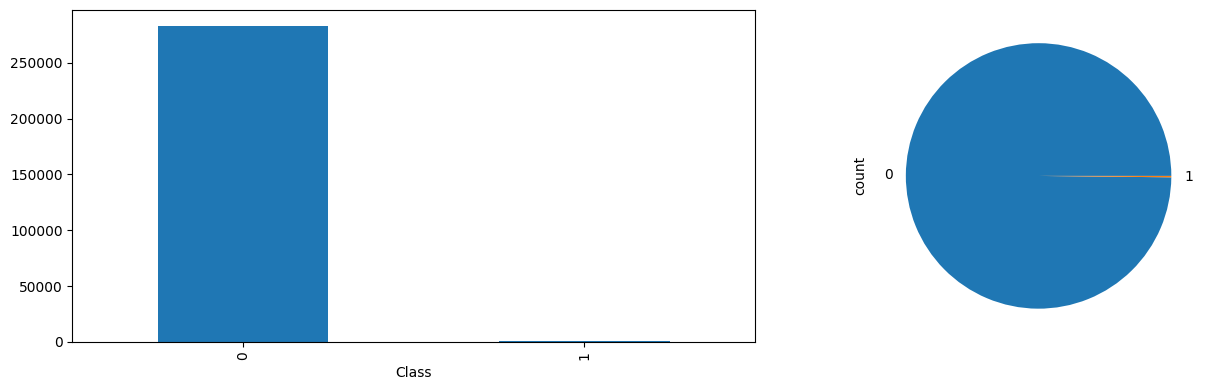

In [42]:
plt.figure(figsize = (14,4))
plt.subplot(121)
df['Class'].value_counts().plot(kind = 'bar')
plt.subplot(122)
df['Class'].value_counts().plot(kind = 'pie')

plt.tight_layout()
plt.show()

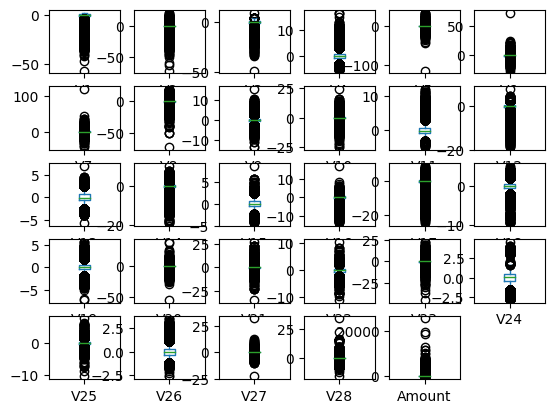

In [20]:
df.drop('Class' , axis = 1).plot(kind = 'box' , subplots = True , layout = (5,6) , sharex = False)
plt.show()

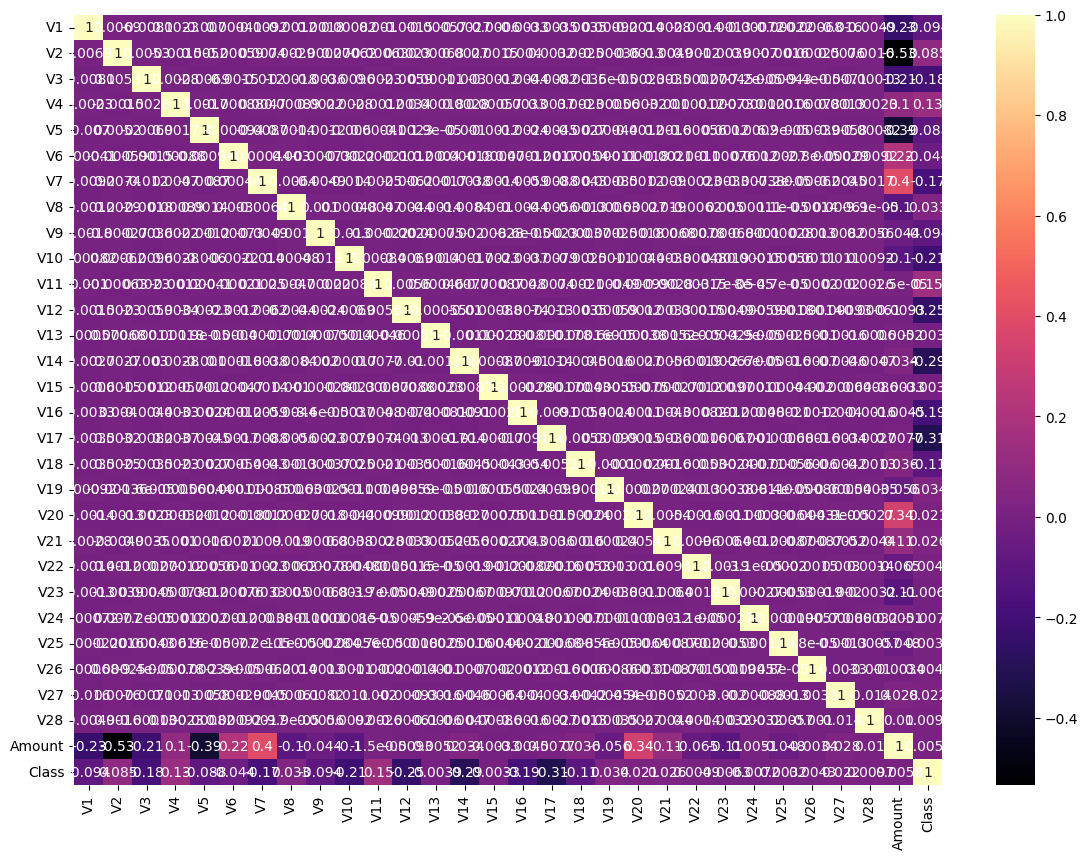

In [44]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr() , annot=True , cmap='magma')
plt.show()

In [22]:
def cap_data(df):
    df_copy = df.copy()  
    for col in df_copy.columns:
        print("capping the", col)
        if df_copy[col].dtype in [float, int]:  # No need for separate checks
            percentiles = df_copy[col].quantile([0.25, 0.75]).values
            df_copy[col][df_copy[col] <= percentiles[0]] = percentiles[0]
            df_copy[col][df_copy[col] >= percentiles[1]] = percentiles[1]
    return df_copy

In [23]:
final_df = cap_data(df.drop('Class' ,axis = 1))
final_df['Class'] = df['Class'].copy()

capping the V1
capping the V2
capping the V3
capping the V4
capping the V5
capping the V6
capping the V7
capping the V8
capping the V9
capping the V10
capping the V11
capping the V12
capping the V13
capping the V14
capping the V15
capping the V16
capping the V17
capping the V18
capping the V19
capping the V20
capping the V21
capping the V22
capping the V23
capping the V24
capping the V25
capping the V26
capping the V27
capping the V28
capping the Amount


In [24]:
X_train , X_test , y_train , y_test = train_test_split(final_df.drop(['Class'] , axis = 1) ,
                                                       final_df['Class'] , random_state=45 ,
                                                       test_size=0.2)

In [25]:
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset , threshold):
    
     # Input validation
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input 'dataset' must be a pandas DataFrame.")
    if not (-1 <= threshold <= 1):
        raise ValueError("Threshold must be between -1 and 1.")
        
    col_corr = set() # set of all the names of correlated column
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] # Getting the name of the colummn
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train , 0.8)
len(set(corr_features))

0

In [27]:
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,IsolationForest,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [29]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
ifc = IsolationForest(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
cat = CatBoostClassifier(n_estimators=50,random_state=2)
lgb = LGBMClassifier(n_estimators=50,random_state=2)

In [30]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ifc': ifc,
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [31]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    
    return accuracy, precision

In [32]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_trf,y_train,X_test_trf,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9969689493532584
Precision -  0.9971778455305865
For  KN
Accuracy -  0.9992598597257957
Precision -  0.9991996079941718
For  NB
Accuracy -  0.9985725866140345
Precision -  0.9971472107370434
For  DT
Accuracy -  0.9991012582384662
Precision -  0.9990373768506565
For  LR
Accuracy -  0.9991541254009093
Precision -  0.9991340178704349
For  RF
Accuracy -  0.999365594050682
Precision -  0.9993223452024551
For  ifc
Accuracy -  0.0
Precision -  0.0
For  AdaBoost
Accuracy -  0.999048391076023
Precision -  0.9990040501187097
For  BgC
Accuracy -  0.9992598597257957
Precision -  0.9992036123456223
For  ETC
Accuracy -  0.9994360836006062
Precision -  0.9994015782678592
For  GBDT
Accuracy -  0.9977972015648681
Precision -  0.9981772029591328
For  xgb
Accuracy -  0.9992951045007578
Precision -  0.9992431899645664
Learning rate set to 0.5
0:	learn: 0.0368401	total: 217ms	remaining: 10.6s
1:	learn: 0.0118620	total: 267ms	remaining: 6.4s
2:	learn: 0.0050393	total: 318ms	remaining:

In [33]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores , 'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.996969,0.997178
1,KN,0.999260,0.999200
2,NB,0.998573,0.997147
3,DT,0.999101,0.999037
4,LR,0.999154,0.999134
5,RF,0.999366,0.999322
6,ifc,0.000000,0.000000
7,AdaBoost,0.999048,0.999004
8,BgC,0.999260,0.999204
9,ETC,0.999436,0.999402


In [34]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.996969
1,KN,Accuracy,0.999260
2,NB,Accuracy,0.998573
3,DT,Accuracy,0.999101
4,LR,Accuracy,0.999154
5,RF,Accuracy,0.999366
6,ifc,Accuracy,0.000000
7,AdaBoost,Accuracy,0.999048
8,BgC,Accuracy,0.999260
9,ETC,Accuracy,0.999436


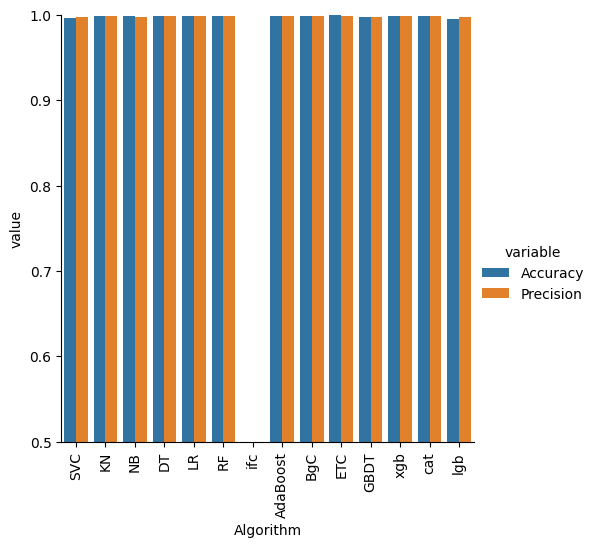

In [35]:
# Categorical Plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5) 
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
X = final_df.iloc[: , :29]
y = final_df.iloc[:,-1]
print(np.mean(cross_val_score(cat , X , y , scoring='accuracy' , cv=5))) # 0.9992633749487823

Learning rate set to 0.5
0:	learn: 0.0371153	total: 61.9ms	remaining: 3.03s
1:	learn: 0.0085746	total: 111ms	remaining: 2.67s
2:	learn: 0.0044589	total: 160ms	remaining: 2.5s
3:	learn: 0.0033184	total: 214ms	remaining: 2.46s
4:	learn: 0.0030271	total: 265ms	remaining: 2.38s
5:	learn: 0.0028548	total: 310ms	remaining: 2.27s
6:	learn: 0.0026953	total: 354ms	remaining: 2.18s
7:	learn: 0.0024949	total: 398ms	remaining: 2.09s
8:	learn: 0.0023831	total: 443ms	remaining: 2.02s
9:	learn: 0.0022814	total: 491ms	remaining: 1.96s
10:	learn: 0.0022089	total: 538ms	remaining: 1.91s
11:	learn: 0.0021322	total: 585ms	remaining: 1.85s
12:	learn: 0.0020373	total: 627ms	remaining: 1.78s
13:	learn: 0.0019237	total: 676ms	remaining: 1.74s
14:	learn: 0.0018637	total: 725ms	remaining: 1.69s
15:	learn: 0.0018110	total: 770ms	remaining: 1.64s
16:	learn: 0.0017749	total: 820ms	remaining: 1.59s
17:	learn: 0.0016740	total: 864ms	remaining: 1.54s
18:	learn: 0.0016056	total: 915ms	remaining: 1.49s
19:	learn: 0.001

13:	learn: 0.0020134	total: 726ms	remaining: 1.87s
14:	learn: 0.0019370	total: 775ms	remaining: 1.81s
15:	learn: 0.0018752	total: 823ms	remaining: 1.75s
16:	learn: 0.0018362	total: 874ms	remaining: 1.7s
17:	learn: 0.0017339	total: 922ms	remaining: 1.64s
18:	learn: 0.0016459	total: 972ms	remaining: 1.59s
19:	learn: 0.0015693	total: 1.02s	remaining: 1.53s
20:	learn: 0.0015039	total: 1.07s	remaining: 1.48s
21:	learn: 0.0014220	total: 1.12s	remaining: 1.42s
22:	learn: 0.0013966	total: 1.16s	remaining: 1.37s
23:	learn: 0.0013383	total: 1.21s	remaining: 1.31s
24:	learn: 0.0012555	total: 1.26s	remaining: 1.26s
25:	learn: 0.0011831	total: 1.3s	remaining: 1.2s
26:	learn: 0.0011425	total: 1.36s	remaining: 1.16s
27:	learn: 0.0010956	total: 1.4s	remaining: 1.1s
28:	learn: 0.0010647	total: 1.47s	remaining: 1.06s
29:	learn: 0.0010487	total: 1.53s	remaining: 1.02s
30:	learn: 0.0010268	total: 1.59s	remaining: 977ms
31:	learn: 0.0010043	total: 1.65s	remaining: 929ms
32:	learn: 0.0009733	total: 1.72s	re